<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Positive Definite Variogram Models

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Permissible Variogram Models** available in GeostatsPy. 

**YouTube Lecture**: check out my lectures on:
        
* [Variogram Introduction](https://youtu.be/jVRLGOsnYuw?si=RD5exyGl_I_LAl4H)
* [Variogram Calculation](https://youtu.be/mzPLicovE7Q?si=-ZPgFK52h2xp1cER)
* [Variogram Parameters](https://youtu.be/NE4xfhIHAm4?si=dF18zj5_M2yVwxoD)
* [Variogram Directions](https://youtu.be/bryRCrtf3hk?si=058uFy-eTtTqwNPr)
* [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL)

For your convenience here's a summary of salient points.

##### Spatial Continuity 


**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

##### The Variogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

$$
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
$$

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

$$
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

Note the correlogram is related to the covariance function as:

$$
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
$$

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

$$
-1.0 \le \rho_x(\bf{h}) \le 1.0
$$

#### Nested Variogram Models

Spatial continuity can be described with nested spatial continuity models:

$$
\Gamma_x(\bf{h}) = \sum_{i=1}^{nst} \gamma_i(\bf{h})
$$

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variogram structures, $\gamma_i(\bf{h})$.

* if each $\gamma_i(\bf{h})$ structure is a positive definite variogram model, then the summation, $\Gamma_x(\bf{h})$, is also positive definite.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes aligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{h}_i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested component of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

In this workflow we will observe the common permissible positive definite variogram models in GeostatsPy that we can combine to build our nested variogram models.  

* for all we assume a contribution of the sill (single structure) and the sill is 1.0 (standardized feature).

#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.78


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

#### Define Functions

This is a convenience function to add major and minor gridlines to improve plot interpretability.

In [3]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### List of Lag Distances

We define a list of lag distances for our variogram models.

In [4]:
h = np.linspace(0,100,101)                                    # lag distance vector

#### Nugget Effect Variogram Model

No spatial correlation

* Does not have a range, nor directionality, i.e., acts over all distances and directions.

Should be a small component of the overall variance
* Very uncommon in siliciclastic sedimentary systems
* More common for mineral grades in mining
* May be measurement error

The equation:

$$
\gamma(\bf{h} ) = c_1 \cdot \text{Nugget} =
\left\{ 
  \begin{array}{ c l }
    0 & h = 0 \\
    c_1 & h > 0
  \end{array}
\right.
$$

where $𝑐_1$ is the contribution, and $h$ is the lag distance

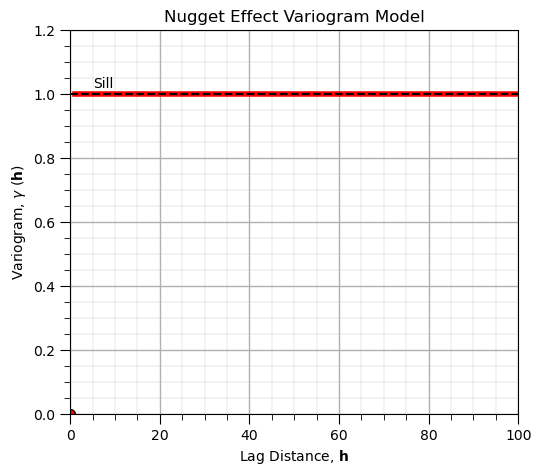

In [5]:
gamma_nugget = np.ones(101)                                   # nugget effect
gamma_nugget[0] = 0

plt.subplot(111)
plot = plt.plot(h[1:],gamma_nugget[1:],color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.scatter(0,0,color='red',edgecolor='black',s=50)
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Nugget Effect Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Spherical Variogram Model

A very commonly observed variogram / spatial continuity form in many settings

* Piecewise, beyond the range is equal to the sill

The equation:

$$
\gamma(\bf{h} ) = c_1 \cdot \text{Sph} \left( \frac{\bf{h} }{a} \right) =
\left\{ 
  \begin{array}{ c l }
    c_1 \cdot \left[ 1.5 \left( \frac{\bf{h} }{a} \right) -  0.5 \left( \frac{\bf{h} }{a} \right)^3 \right] & h < a \\
    c_1 & h \ge a
  \end{array}
\right.
$$

where $𝑐_1$ is the contribution, $𝑎$ is the range and $\bf{𝐡}$ is the lag distance

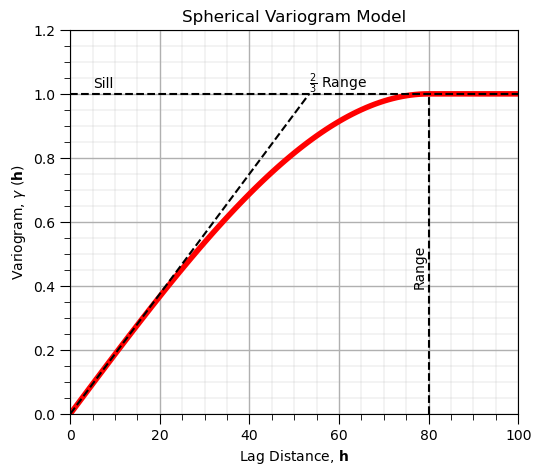

In [6]:
vrange = 80                                                   # range parameter

gamma_sph = 1.0*(1.5*h/vrange) - 0.5*np.power(h/vrange,3)     # spherical model
gamma_sph[h > vrange] = 1.0

plt.subplot(111)
plot = plt.plot(h,gamma_sph,color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.plot([0,vrange*2/3],[0,1.0],color='black',ls='--'); plt.annotate(r'$\frac{2}{3}$ Range',[vrange*2/3,1.02])
plt.plot([vrange,vrange],[0.0,1.0],color='black',ls='--'); plt.annotate('Range',[vrange-3.5,0.4],rotation=90.0)
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Spherical Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Exponential Variogram Model

Also very commonly observed variogram / spatial continuity form

* Less short-scale continuity than spherical, and reaches sill asymptotically, range is at 95% of the sill 

The equation:

$$
\gamma( \bf{h} ) = c_1 \cdot \text{ Exp } \left( \frac{ \bf{h} }{𝑎} \right) = c_1 \cdot \left[ 1.0 − \text{exp} \left(−3 \cdot \left( \frac{ \bf{h} }{𝑎} \right) \right) \right]
$$

where $𝑐_1$ is the contribution, $𝑎$ is the range and $\bf{h}$ is the lag distance.

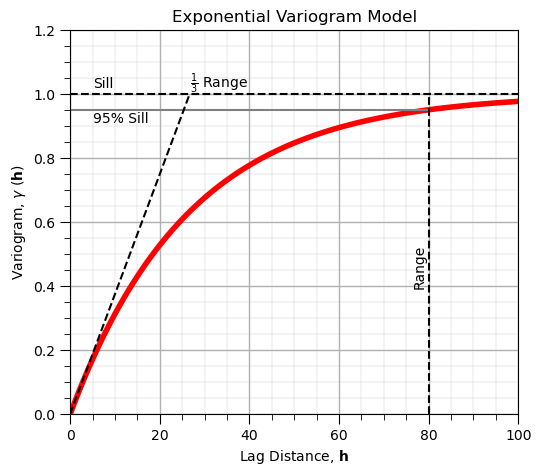

In [7]:
vrange = 80                                                   # range parameter

gamma_exp = 1.0*(1.0-np.exp(-3*(h/vrange)))                   # exponential model

plt.subplot(111)
plot = plt.plot(h,gamma_exp,color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.plot([0,vrange],[0.95,0.95],color='grey',ls='-'); plt.annotate('95% Sill',[5,0.91])
plt.plot([vrange,vrange],[0.0,1.0],color='black',ls='--'); plt.annotate('Range',[vrange-3.5,0.4],rotation=90.0)
plt.plot([0,vrange*1/3],[0,1.0],color='black',ls='--'); plt.annotate(r'$\frac{1}{3}$ Range',[vrange*1/3,1.02])
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Exponential Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Gaussian Variogram Model

Less commonly observed variogram / spatial continuity form, e.g., for thickness and elevation

* Much more short-scale continuity than spherical, and reaches sill asymptotically, range is at 95% of the sill 

The equation:

$$
\gamma( \bf{h} ) = c_1 \cdot \text{ Gaus } \left( \frac{ \bf{h} }{𝑎} \right) = c_1 \cdot \left[ 1.0 − \text{exp} \left(−3 \cdot \left( \frac{ \bf{h} }{𝑎} \right)^2 \right) \right]
$$

where $𝑐_1$ is the contribution, $𝑎$ is the range and $\bf{h}$ is the lag distance.

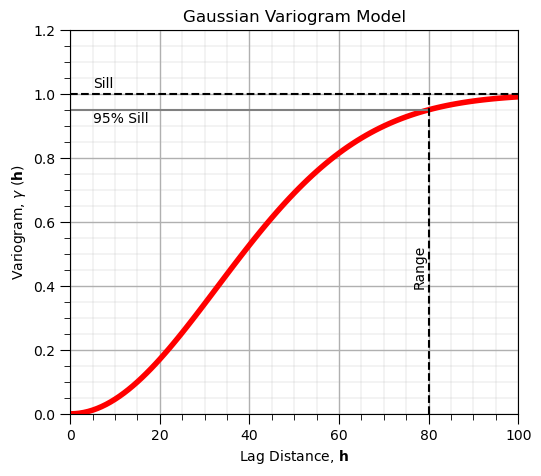

In [8]:
vrange = 80                                                   # range parameter

gamma_gaus = 1.0*(1.0-np.exp(-3*np.power(h/vrange,2)))        # Gaussian model

plt.subplot(111)
plot = plt.plot(h,gamma_gaus,color='red',lw=4)
plt.plot([0,100],[1.0,1.0],color='black',ls='--'); plt.annotate('Sill',[5,1.02])
plt.plot([0,vrange],[0.95,0.95],color='grey',ls='-'); plt.annotate('95% Sill',[5,0.91])
plt.plot([vrange,vrange],[0.0,1.0],color='black',ls='--'); plt.annotate('Range',[vrange-3.5,0.4],rotation=90.0)
gca = plt.gca()
plt.xlim([0,100]); plt.ylim([0,1.2])
plt.xlabel(r'Lag Distance, $\bf{h}$'); plt.ylabel(r'Variogram, $\gamma$ ($\bf{h}$)')
plt.title('Gaussian Variogram Model'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic demonstration of permissible variogram models to support 3D model construction. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)